# Premières régressions

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [5]:
## Paths
# folder_path_M = '/Users/maximehenon/Documents/GitHub/MAR25_BDS_Compagnon_Immo/'
# folder_path_Y = 'C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON'
folder_path_C = '../data/processed/Sales'
#folder_path_L= '/Users/loick.d/Documents/Datascientest/Github immo/MAR25_BDS_Compagnon_Immo/'

# Reload datas
# X_test_encoded = pd.read_csv(os.path.join(folder_path_M, 'X_test_encoded.csv'), sep=';')
# X_train_encoded = pd.read_csv(os.path.join(folder_path_M, 'X_train_encoded.csv'), sep=';')
# # y_train_clean = pd.read_csv(os.path.join(folder_path_M, 'y_train_clean.csv'), sep=';')
# y_train = pd.read_csv(os.path.join(folder_path_M, 'y_train.csv'), sep=';')

# X_test_encoded = pd.read_csv(os.path.join(folder_path_Y, 'X_test_encoded.csv'), sep=';')
# X_train_encoded = pd.read_csv(os.path.join(folder_path_Y, 'X_train_encoded.csv'), sep=';')
# # y_train_clean = pd.read_csv(os.path.join(folder_path_Y, 'y_train_clean.csv'), sep=';')
# y_train = pd.read_csv(os.path.join(folder_path_Y, 'y_train.csv'), sep=';')

X_test_encoded = pd.read_csv(os.path.join(folder_path_C, 'X_test_encoded.csv'), sep=';')
X_train_encoded = pd.read_csv(os.path.join(folder_path_C, 'X_train_encoded.csv'), sep=';')
# y_train_clean = pd.read_csv(os.path.join(folder_path_C, 'y_train_clean.csv'), sep=';')
y_train = pd.read_csv(os.path.join(folder_path_C, 'y_train.csv'), sep=';')

# X_test_encoded = pd.read_csv(os.path.join(folder_path_L, 'X_test_encoded.csv'), sep=';')
# X_train_encoded = pd.read_csv(os.path.join(folder_path_L, 'X_train_encoded.csv'), sep=';')
# # y_train_clean = pd.read_csv(os.path.join(folder_path_L, 'y_train_clean.csv'), sep=';')
# y_train = pd.read_csv(os.path.join(folder_path_L, 'y_train.csv'), sep=';')


In [ ]:
# liste des features par RFE
# ['surface', 'surface_terrain', 'dpeC', 'places_parking', 'charges_copro', 'duree_int', 'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6', 'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7', 'bain_outlier_flag', 'duree_int_outlier_flag', 'eau_outlier_flag', 'etage_outlier_flag', 'loyer_m2_median_n6_outlier_flag', 'loyer_m2_median_n7_outlier_flag', 'nb_log_n7_outlier_flag', 'nb_pieces_outlier_flag', 'nb_toilettes_outlier_flag', 'places_parking_outlier_flag', 'surface_outlier_flag', 'surface_terrain_outlier_flag', 'taux_rendement_n6_outlier_flag', 'taux_rendement_n7_outlier_flag', 'ges_class', 'dpeL', 'logement_neuf', 'nb_pieces', 'bain', 'eau', 'nb_toilettes', 'exposition', 'chauffage_energie', 'chauffage_systeme', 'date', 'nb_etages', 'typedebien_a', 'typedebien_an', 'typedebien_m', 'typedebien_mn', 'typedetransaction_vp', 'cave_nan', 'annee_construction_1948-1974', 'annee_construction_2001-2005', 'annee_construction_2006-2012', 'annee_construction_2013-2021', 'annee_construction_MISSING', 'annee_construction_après 2021', 'annee_construction_avant 1948', 'porte_digicode_False', 'porte_digicode_True', 'ascenseur_nan', 'chauffage_mode_Individuel', 'chauffage_mode_Individuel, Central', 'chauffage_mode_MISSING', 'x_geo', 'y_geo', 'z_geo']

# X = X_train_encoded[['surface', 'surface_terrain', 'dpeC', 'places_parking', 'charges_copro', 'duree_int', 'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6', 'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7', 'bain_outlier_flag', 'charges_copro_outlier_flag', 'codePostal_outlier_flag', 'duree_int_outlier_flag', 'eau_outlier_flag', 'etage_outlier_flag', 'loyer_m2_median_n6_outlier_flag', 'loyer_m2_median_n7_outlier_flag', 'nb_pieces_outlier_flag', 'nb_toilettes_outlier_flag', 'places_parking_outlier_flag', 'surface_outlier_flag', 'surface_terrain_outlier_flag', 'taux_rendement_n6_outlier_flag', 'taux_rendement_n7_outlier_flag', 'ges_class', 'dpeL', 'logement_neuf', 'nb_pieces', 'bain', 'eau', 'nb_toilettes', 'nb_etages', 'exposition', 'chauffage_energie', 'chauffage_systeme', 'date', 'etage_3.0', 'typedebien_a', 'typedebien_an', 'typedebien_m', 'typedebien_mn', 'typedetransaction_pi', 'typedetransaction_v', 'typedetransaction_vp', 'cave_True', 'annee_construction_1948-1974', 'annee_construction_1989-2000', 'annee_construction_2001-2005', 'annee_construction_2006-2012', 'annee_construction_2013-2021', 'annee_construction_MISSING', 'annee_construction_après 2021', 'annee_construction_avant 1948', 'porte_digicode_False', 'ascenseur_False', 'chauffage_mode_Collectif', 'chauffage_mode_Collectif, Central', 'chauffage_mode_Individuel', 'chauffage_mode_Individuel, Central', 'chauffage_mode_MISSING', 'x_geo', 'y_geo', 'z_geo']]
X = X_train_encoded[['surface', 'surface_terrain', 'dpeC', 'places_parking', 'charges_copro', 'duree_int', 'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6', 'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7', 'bain_outlier_flag', 'duree_int_outlier_flag', 'eau_outlier_flag', 'etage_outlier_flag', 'loyer_m2_median_n6_outlier_flag', 'loyer_m2_median_n7_outlier_flag', 'nb_log_n7_outlier_flag', 'nb_pieces_outlier_flag', 'nb_toilettes_outlier_flag', 'places_parking_outlier_flag', 'surface_outlier_flag', 'surface_terrain_outlier_flag', 'taux_rendement_n6_outlier_flag', 'taux_rendement_n7_outlier_flag', 'ges_class', 'dpeL', 'logement_neuf', 'nb_pieces', 'bain', 'eau', 'nb_toilettes', 'exposition', 'chauffage_energie', 'chauffage_systeme', 'date', 'nb_etages', 'typedebien_a', 'typedebien_an', 'typedebien_m', 'typedebien_mn', 'typedetransaction_vp', 'cave', 'annee_construction_1948-1974', 'annee_construction_2001-2005', 'annee_construction_2006-2012', 'annee_construction_2013-2021', 'annee_construction_MISSING', 'annee_construction_après 2021', 'annee_construction_avant 1948', 'porte_digicode', 'ascenseur', 'chauffage_mode_Individuel', 'chauffage_mode_Individuel, Central', 'chauffage_mode_MISSING', 'x_geo', 'y_geo', 'z_geo']]

In [ ]:

# Increase max_iter and adjust tol
model_en = ElasticNetCV(cv=8, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99),
                        alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0),
                        max_iter=10000, tol=1e-4)
# Ensure y_train is a 1D array
y_train = np.ravel(y_train)

# Fit the model
model_en.fit(X_train_encoded, y_train)

In [ ]:

coeffs = list(model_en.coef_)
coeffs.insert(0, model_en.intercept_)
feats = list(X.columns)
feats.insert(0, 'intercept')
pd.DataFrame({'valeur estimée': coeffs}, index=feats)




,valeur estimée
intercept,1547.093069
surface,-15.724085
surface_terrain,-6.971294
dpeC,-38.938984
places_parking,-21.120807
...,...
"chauffage_mode_Individuel, Central",11.038203
chauffage_mode_MISSING,-27.631773
x_geo,2478.631824
y_geo,-146.658303


,residus
count,4.147030e+06
mean,-1.482585e-12
std,1.258340e+03
min,-4.001045e+04
25%,-4.366876e+02
50%,1.982425e+01
75%,5.279687e+02
max,5.808413e+05


(0.0, 20000.0)

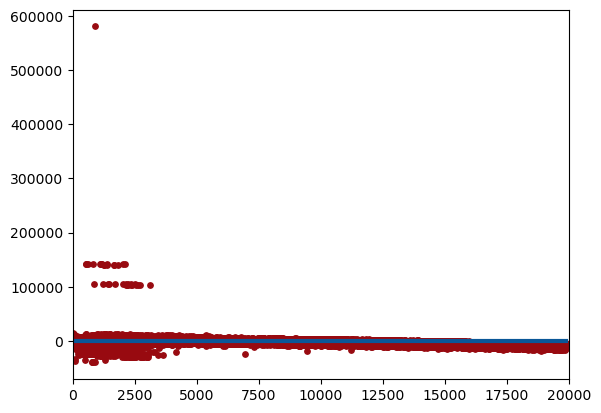

In [84]:

pred_train = model_en.predict(X)
pred_train = pd.DataFrame(pred_train, columns=['pred_train'])
residus = pred_train.values - y_train.values
residus = pd.DataFrame(residus, columns=['residus'])
display(residus.describe())

plt.scatter(y_train, residus, color='#980a10', s=15)
plt.plot((y_train.min(), y_train.max()), (0, 0), lw=3, color='#0a5798');
plt.xlim(0,20000) #  y_train.max())

# GridSearch

Il est aussi fréquent d'entrainer plusieurs modèles différents, de comparer les performances de chacun (scores, overfitting, temps d'entrainement) et de choisir le meilleur.

C'est celui-ci que l'on optimise ensuite grâce à GridSearchCV en jouant sur les hyperparamètres.

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_rf.fit(X_train_encoded, y_train)

# Best parameters
print("Best parameters for RandomForestRegressor:", grid_search_rf.best_params_)

## KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Define the model
knn = KNeighborsRegressor()

# Define the parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_knn.fit(X_train_encoded, y_train)

# Best parameters
print("Best parameters for KNeighborsRegressor:", grid_search_knn.best_params_)

## SVM Regressor

In [ ]:
from sklearn.svm import SVR

# Define the model
svr = SVR()

# Define the parameter grid
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Set up GridSearchCV
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_svr.fit(X_train_encoded, y_train)

# Best parameters
print("Best parameters for SVR:", grid_search_svr.best_params_)

## XGBoostRegressor

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

# Define the model
xgboost = xgb.XGBRegressor()

# Define the parameter grid
param_grid_xgboost = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search_xgboost = GridSearchCV(estimator=xgboost, param_grid=param_grid_xgboost, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_xgboost.fit(X_train_encoded, y_train)

# Best parameters
print("Best parameters for XGBoostRegressor:", grid_search_xgboost.best_params_)